In [4]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

Dataset size:  2500  Test size:  1000.0
Training:  1250
Removing blocks... [3.5, 7]


<IPython.core.display.Javascript object>


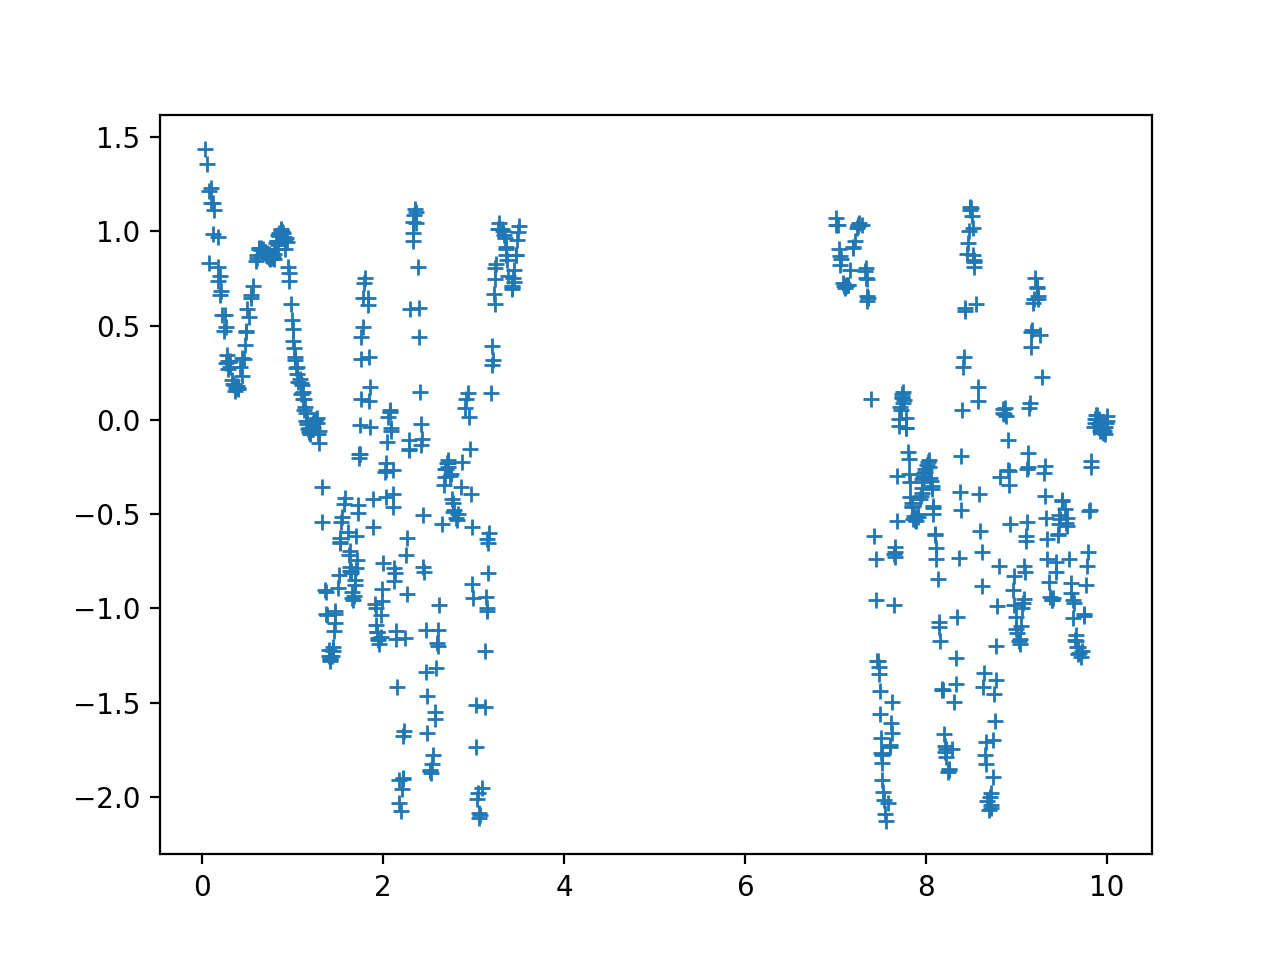

In [9]:
path = 'data/sample_3.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=1250, test=0.4, norm_out=False)
X_test, y_test = delete_blocks(X_test, y_test,
                               intervals=[3.5,7])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

# Baseline models

create full GP model and optimize ...
Test MSE =0.004, NLL =-1.361


<IPython.core.display.Javascript object>


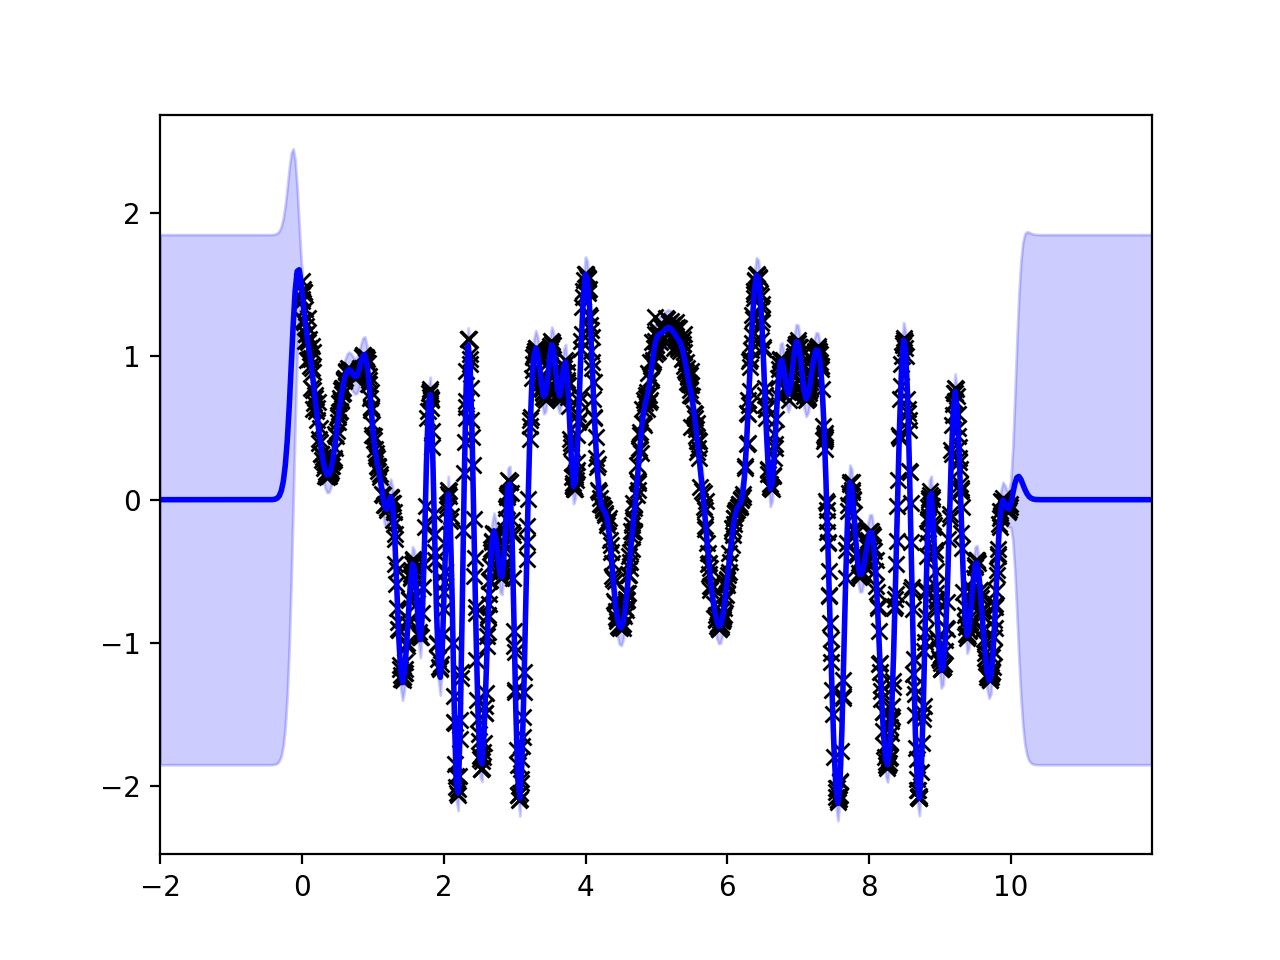

In [10]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [5]:
# fig.savefig('../fig.png')
# save_df('../', df, name='scores')

## Sparse GP

create SGP model and optimize ...
Test MSE =0.012, NLL =-0.454


<IPython.core.display.Javascript object>


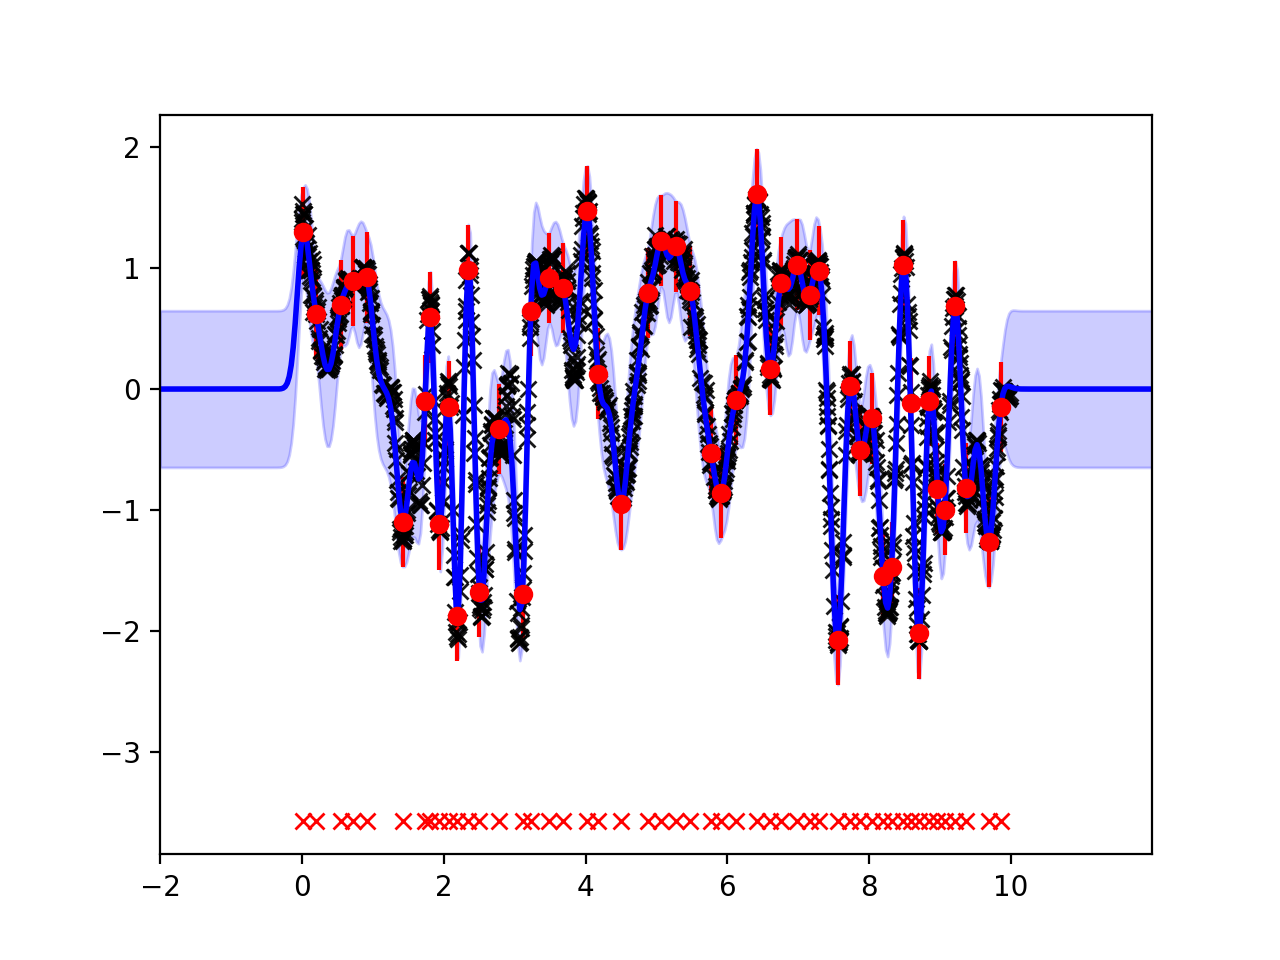

In [11]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=50)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
Default initialisation
iter 0 	 obj 21.826
iter 50 	 obj 4.420
iter 100 	 obj 3.481
iter 150 	 obj 2.885
iter 200 	 obj 2.162
iter 250 	 obj 1.701
iter 300 	 obj 1.318
iter 350 	 obj 1.110
iter 400 	 obj 1.035
iter 450 	 obj 0.950
iter 500 	 obj 1.062
iter 550 	 obj 0.989
iter 600 	 obj 0.985
iter 650 	 obj 0.855
iter 700 	 obj 0.915
iter 750 	 obj 0.871
iter 800 	 obj 0.816
iter 850 	 obj 0.781
iter 900 	 obj 0.856
iter 950 	 obj 0.823
Test MSE= 0.349, NLL= 0.734, SN= 0.407


<IPython.core.display.Javascript object>


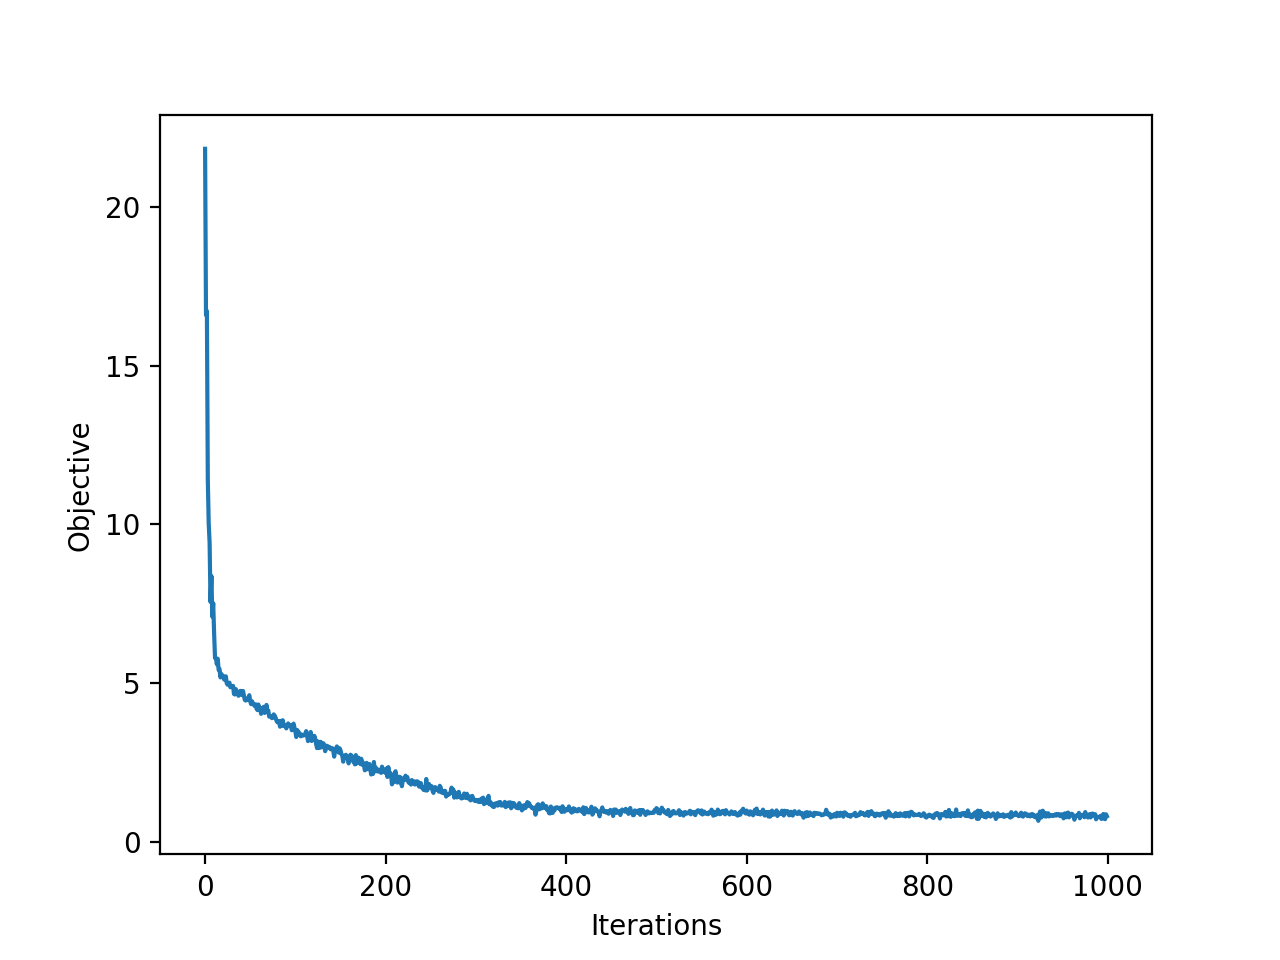

In [12]:
N_train = X_train.shape[0]
config_dict = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [], 'init_type': True}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [3]:
config_dict['optimizer'] = 'adam'
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict,
                              new_max_it=1000, return_cost=False)

NameError: name 'config_dict' is not defined

In [9]:
print dir(DGP_figures)

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'h_out', 'h_out2', 'in_h', 'in_out', 'plot', 'plot_cost', 'plot_h_out', 'plot_hidden', 'plot_in_h', 'plot_init', 'plot_sample']


### Fitting plots

<IPython.core.display.Javascript object>


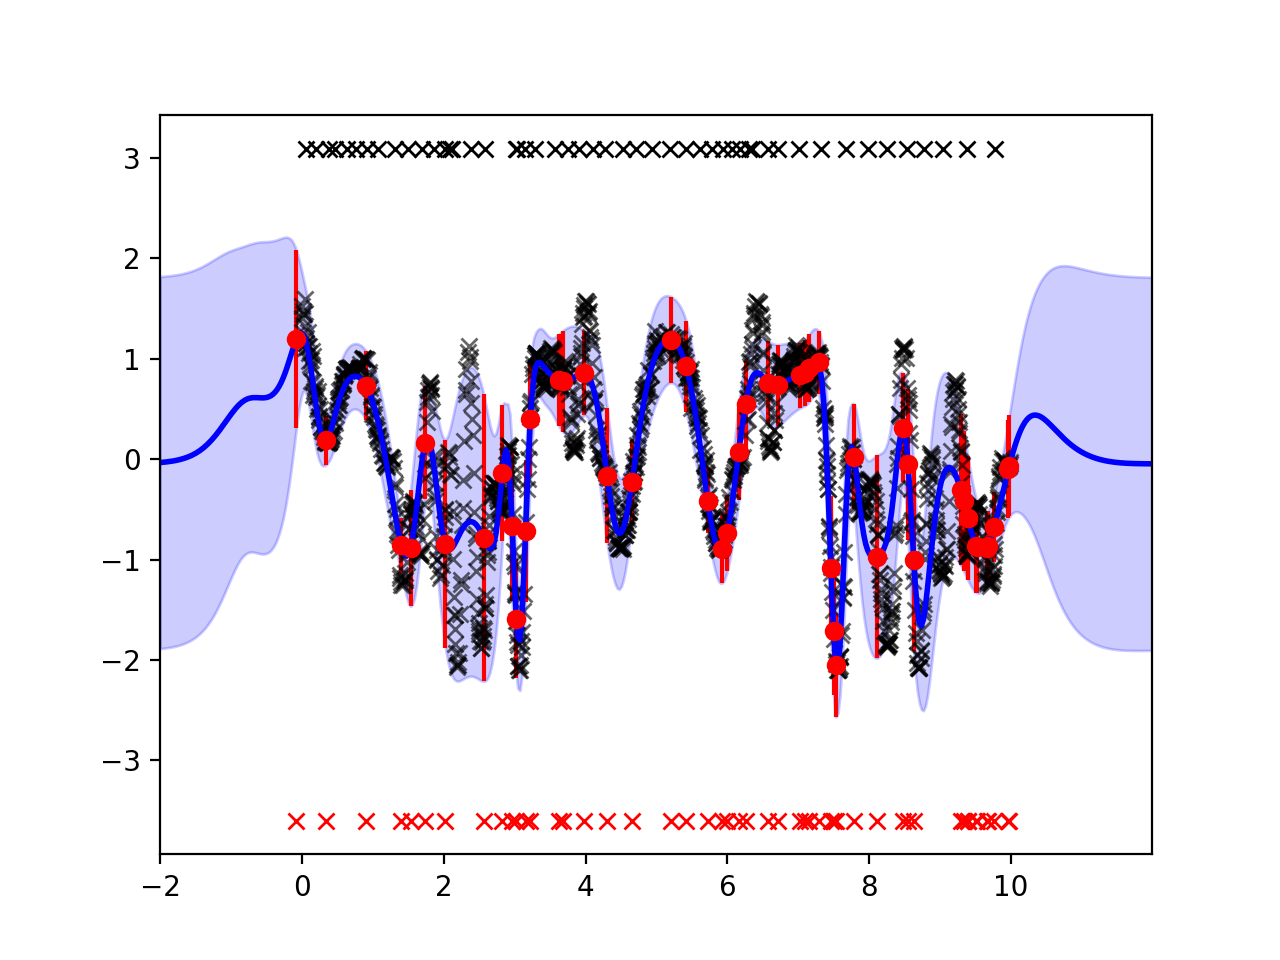

Default initialisation


<IPython.core.display.Javascript object>


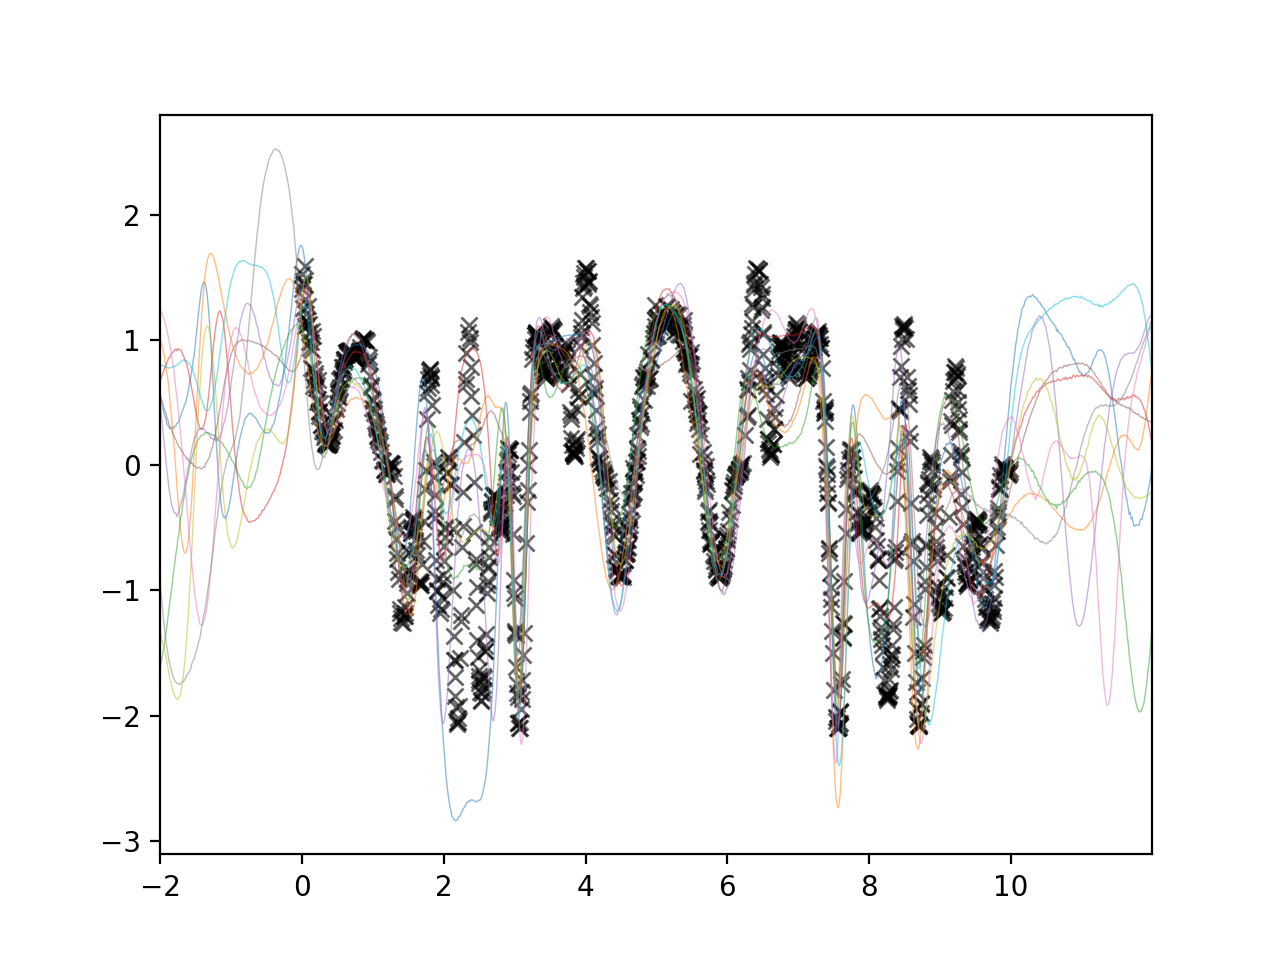

In [10]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

<IPython.core.display.Javascript object>


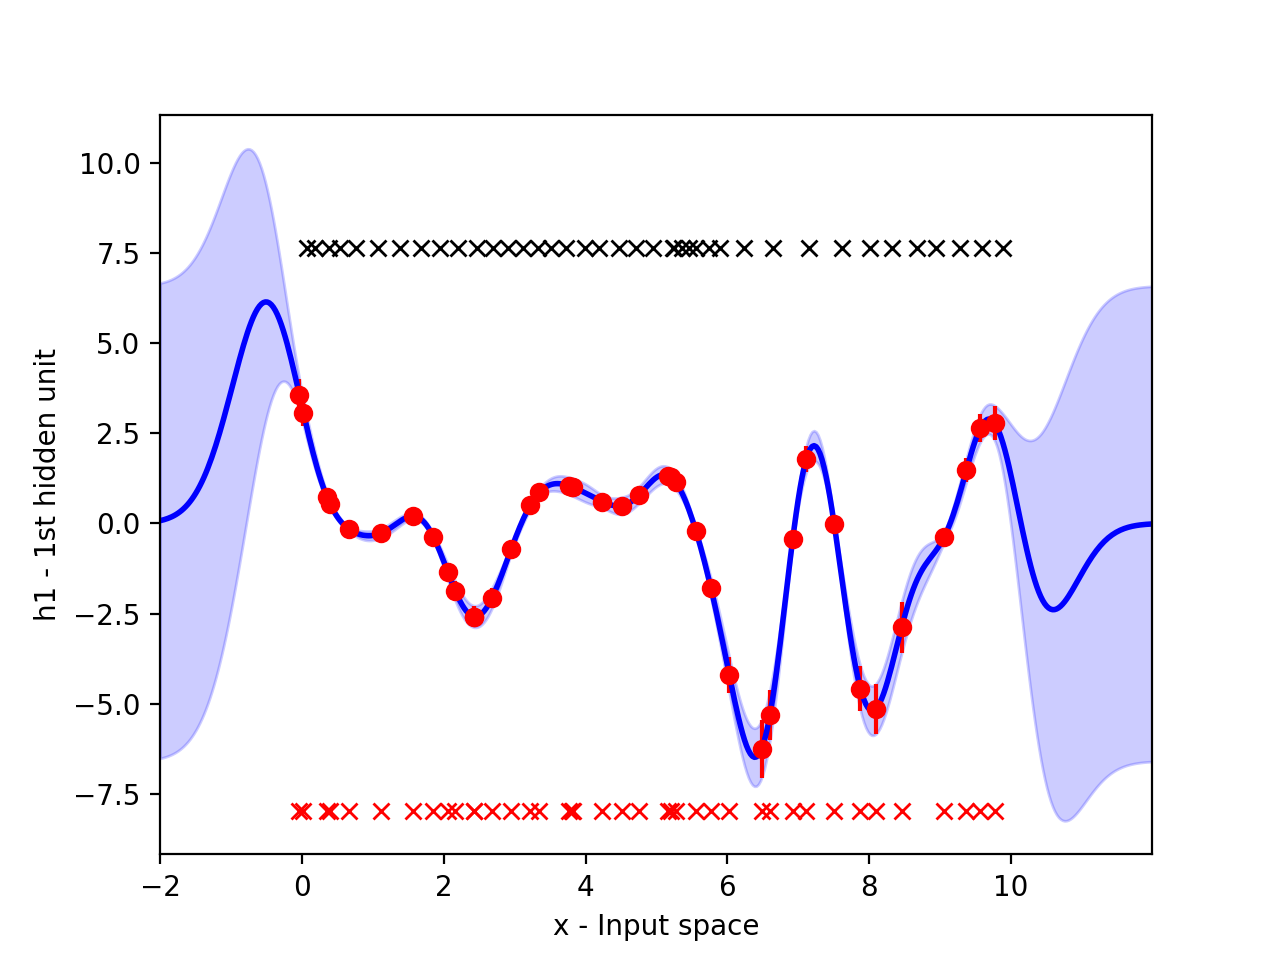

<IPython.core.display.Javascript object>


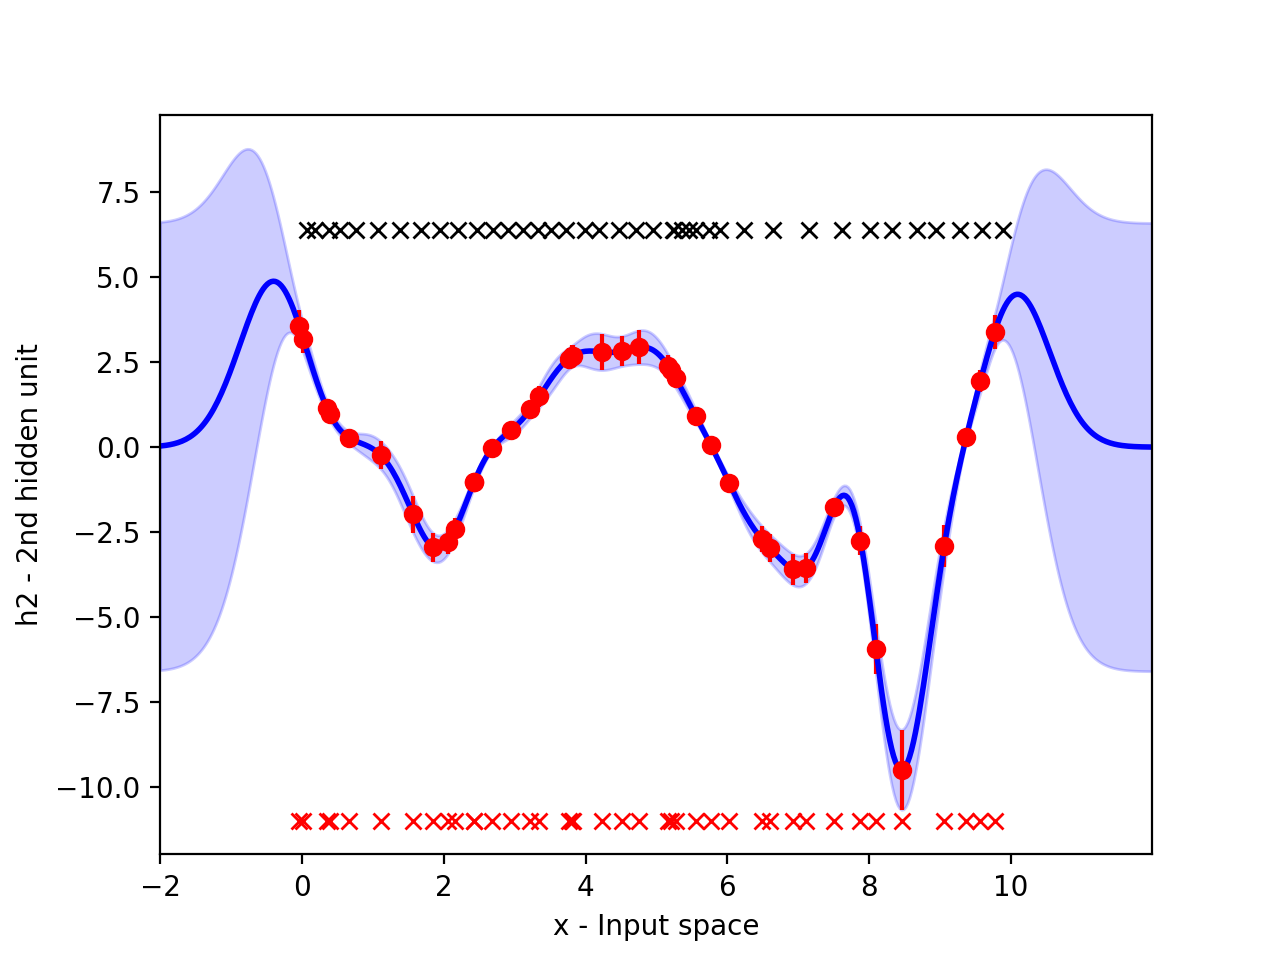

In [11]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

<IPython.core.display.Javascript object>


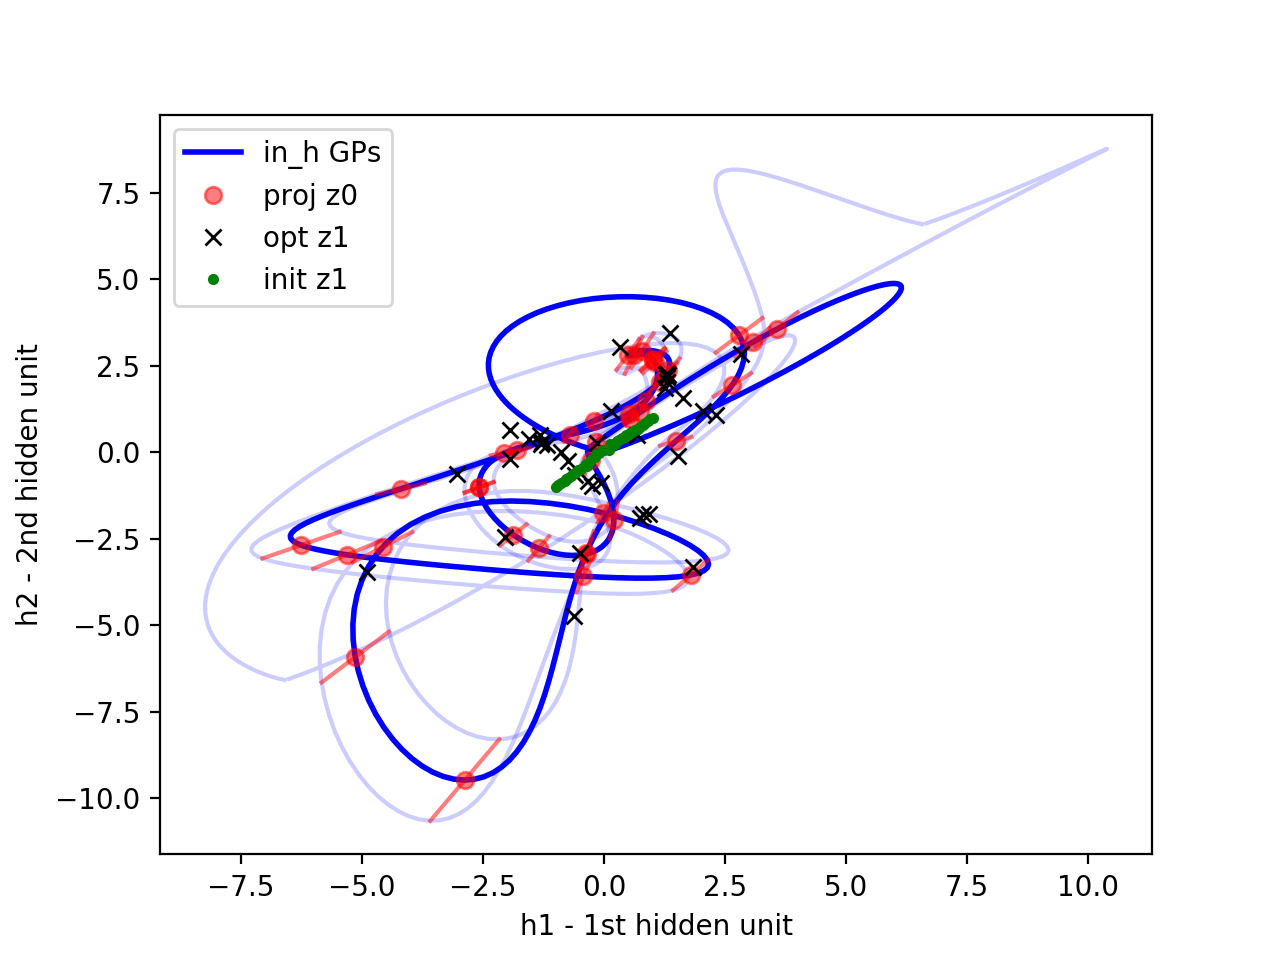

In [12]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

<IPython.core.display.Javascript object>


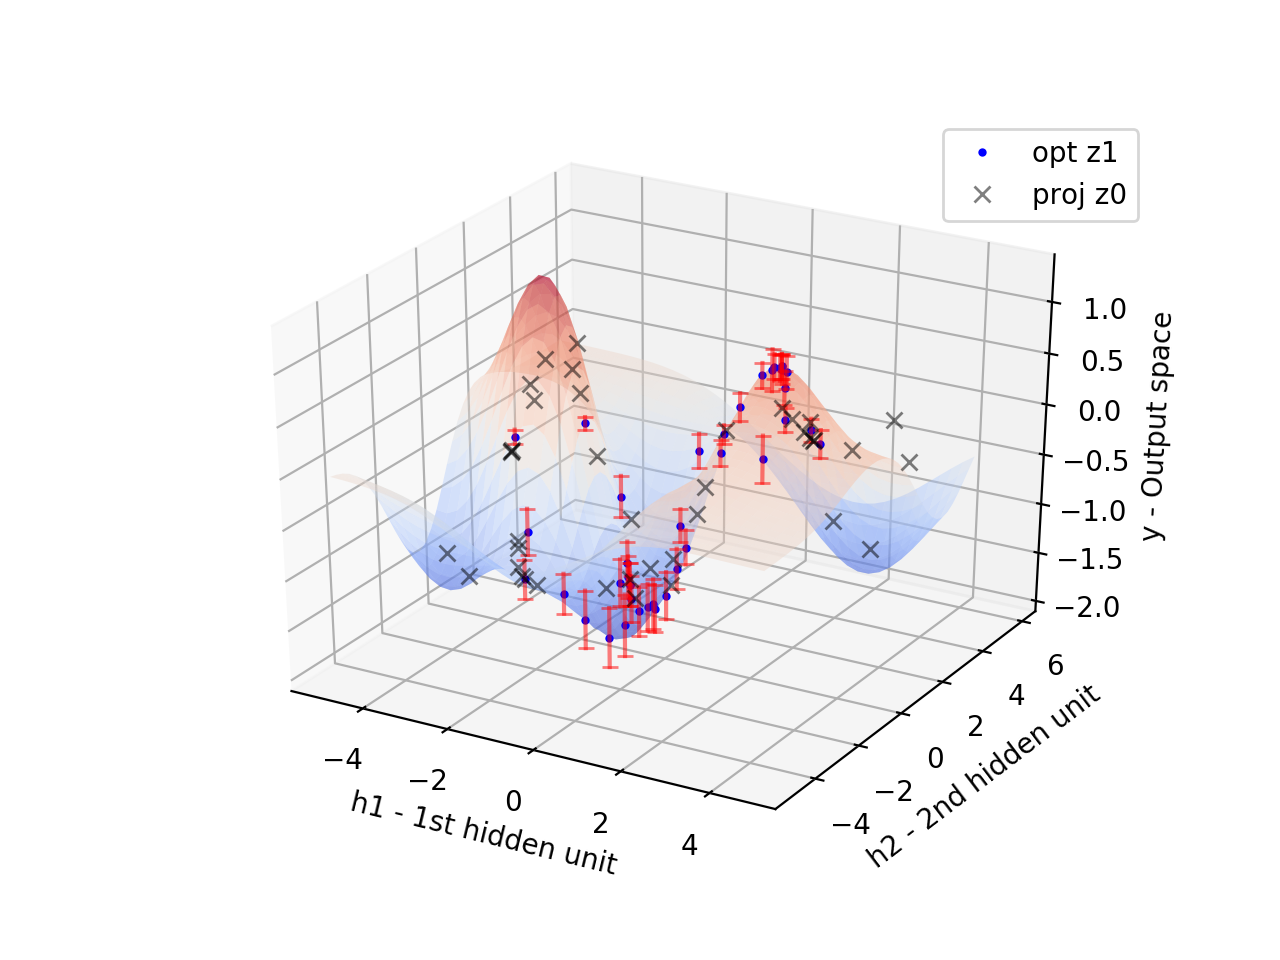

In [54]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

<IPython.core.display.Javascript object>


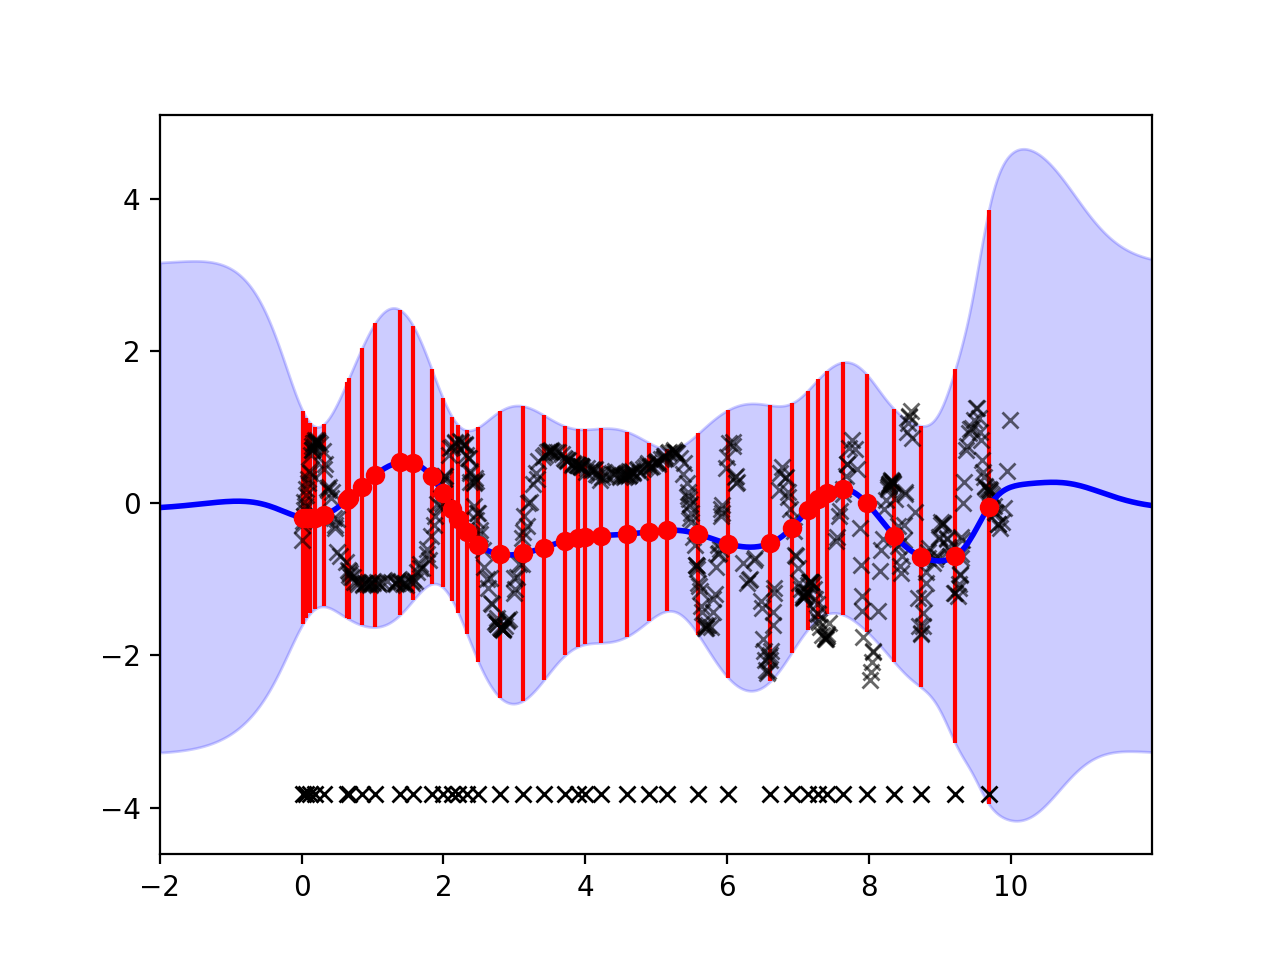

In [55]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

In [2]:
model

NameError: name 'model' is not defined